🔍 1. Setup & Libraries

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/Users/saswatranjannayak/Desktop/hr_dataset.csv")

# Set visualization style
sns.set(style="whitegrid")


📊 2. Attrition Count Plot

/var/folders/sf/9k7lsjjj7xbg957cdpbqccj80000gn/T/ipykernel_8285/1653935997.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=df, palette='Set2')


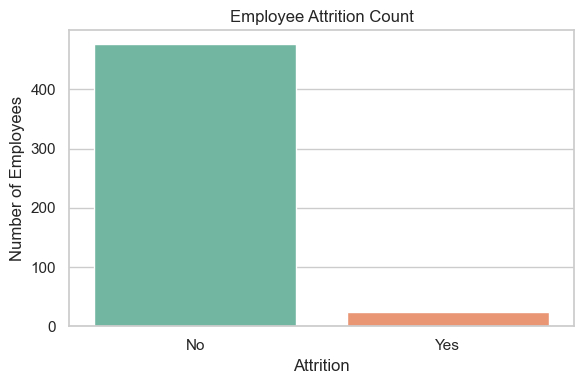

In [37]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=df, palette='Set2')
plt.title('Employee Attrition Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Number of Employees')
plt.xlabel('Attrition')
plt.tight_layout()
plt.show()


Employee Attrition Count:

Most employees stayed; overall attrition rate is low.

🏢 3. Department-wise Attrition

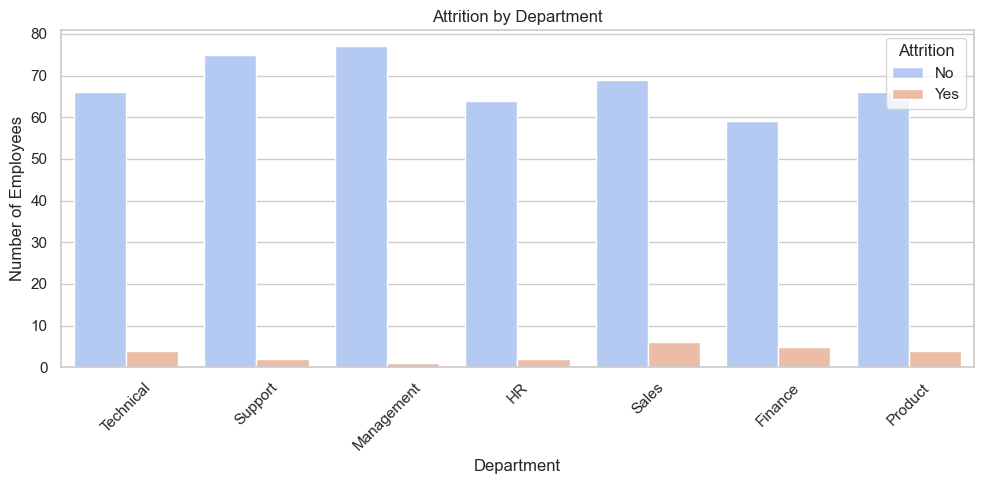

In [38]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Department', hue='Attrition', palette='coolwarm')
plt.title('Attrition by Department')
plt.xticks(rotation=45)
plt.ylabel('Number of Employees')
plt.xlabel('Department')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


Attrition by Department:

Sales and Finance have higher attrition compared to other departments.
Management shows the lowest attrition.

💰 4. Attrition by Salary Band

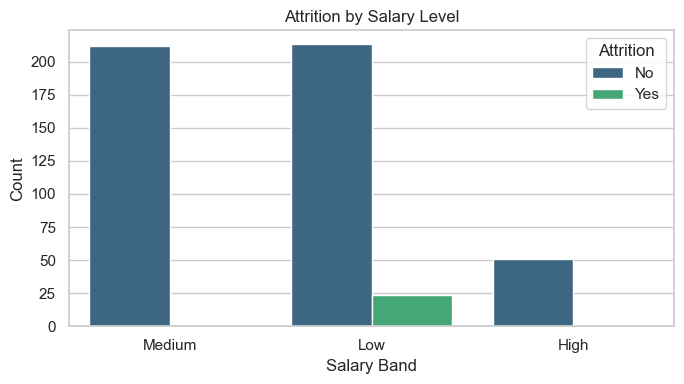

In [39]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='Salary', hue='Attrition', palette='viridis')
plt.title('Attrition by Salary Level')
plt.xlabel('Salary Band')
plt.ylabel('Count')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


Attrition by Salary Level:

Low salary employees have significantly higher attrition.
No attrition observed in the high salary group.

🧭 5. Promotions vs Attrition

/var/folders/sf/9k7lsjjj7xbg957cdpbqccj80000gn/T/ipykernel_8285/2534023484.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='NumPromotions', data=df, palette='Pastel1')


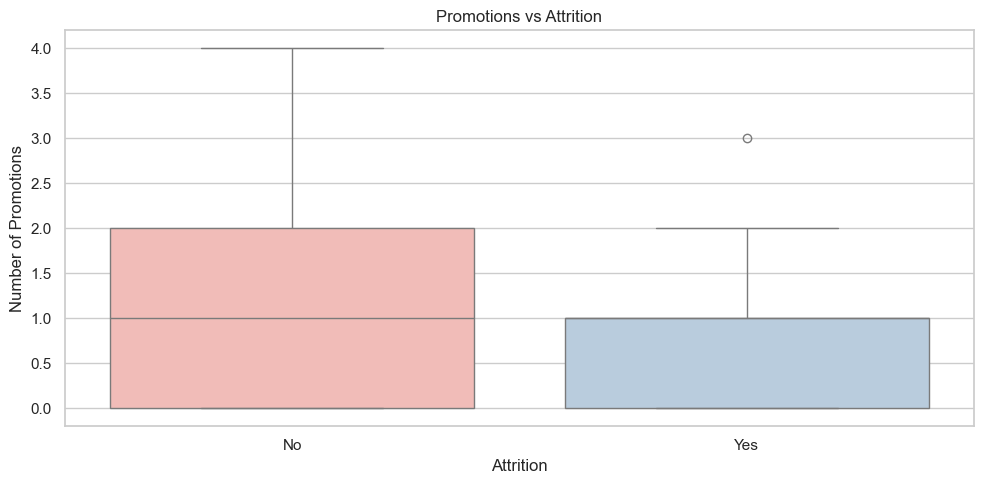

In [40]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Attrition', y='NumPromotions', data=df, palette='Pastel1')
plt.title('Promotions vs Attrition')
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Attrition')
plt.ylabel('Number of Promotions')
plt.tight_layout()
plt.show()


Promotions vs Attrition:

Employees who left generally received fewer promotions.
Promotion opportunities may impact retention.

😊 6. Satisfaction Level vs Attrition

/var/folders/sf/9k7lsjjj7xbg957cdpbqccj80000gn/T/ipykernel_8285/252097832.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Attrition', y='SatisfactionLevel', data=df, palette='Set3')


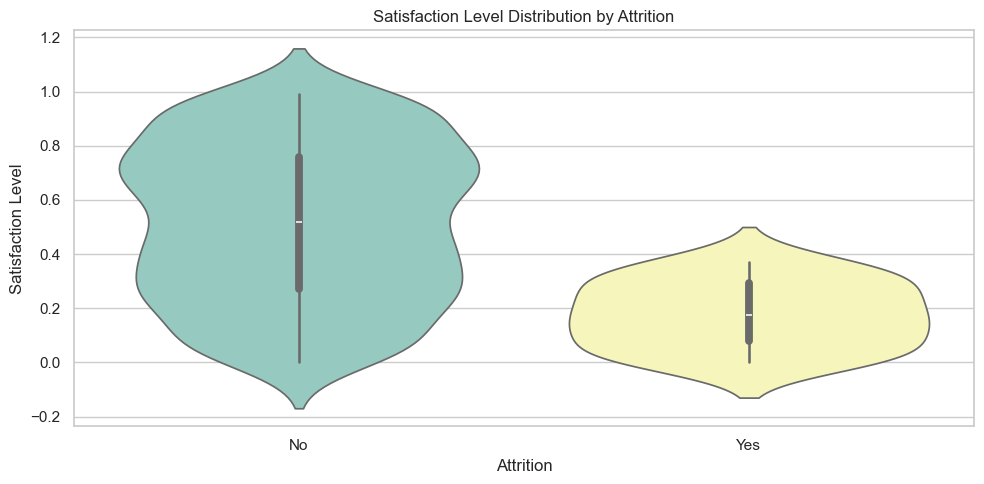

In [41]:
plt.figure(figsize=(10, 5))
sns.violinplot(x='Attrition', y='SatisfactionLevel', data=df, palette='Set3')
plt.title('Satisfaction Level Distribution by Attrition')
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Attrition')
plt.ylabel('Satisfaction Level')
plt.tight_layout()
plt.show()


Employees who left (Attrition = Yes) have significantly lower satisfaction levels, clustered near the bottom of the scale.
Employees who stayed (Attrition = No) show a wide range of satisfaction levels, with many having moderate to high satisfaction.
Low satisfaction is strongly associated with higher attrition.

🧪 7. Correlation Heatmap

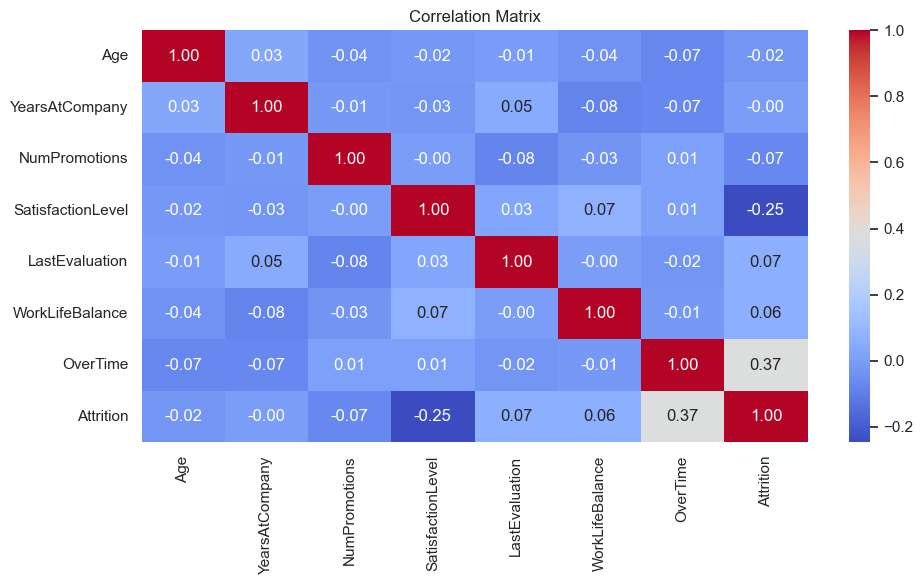

In [42]:
plt.figure(figsize=(10, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


Correlation Matrix

Overtime has the strongest positive correlation with attrition (0.37).
Job satisfaction negatively correlates with attrition (-0.25).
Other factors show minimal correlation with attrition.

In [43]:
# Encode categorical variables
le = LabelEncoder()
df['Department'] = le.fit_transform(df['Department'])
df['Salary'] = le.fit_transform(df['Salary'])

# Features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


🔹 Logistic Regression Accuracy: 0.94
🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        95
           1       0.00      0.00      0.00         5

    accuracy                           0.94       100
   macro avg       0.47      0.49      0.48       100
weighted avg       0.90      0.94      0.92       100



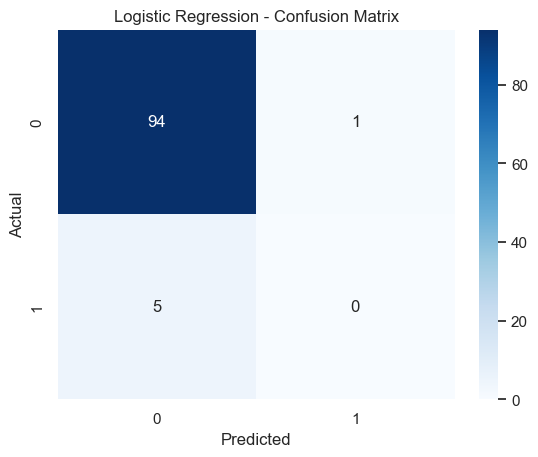

In [44]:
# Logistic Regression Model (Corrected)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)  # Corrected here!
y_pred_lr = lr.predict(X_test)

# Evaluation
print("🔹 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("🔹 Classification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


🔸 Decision Tree Accuracy: 1.0
🔸 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00         5

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



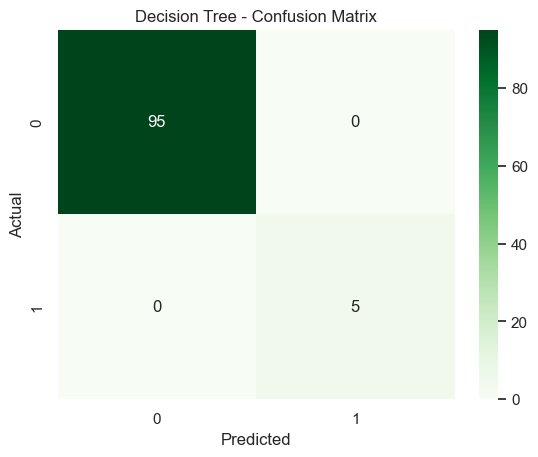

In [45]:
# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Evaluation
print("🔸 Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("🔸 Classification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens')
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [46]:
import shap

# SHAP Explainer (auto-detects the right method)
explainer = shap.Explainer(dt, X_train)

# Compute SHAP values for test set
shap_values = explainer(X_test)


<Figure size 640x480 with 0 Axes>

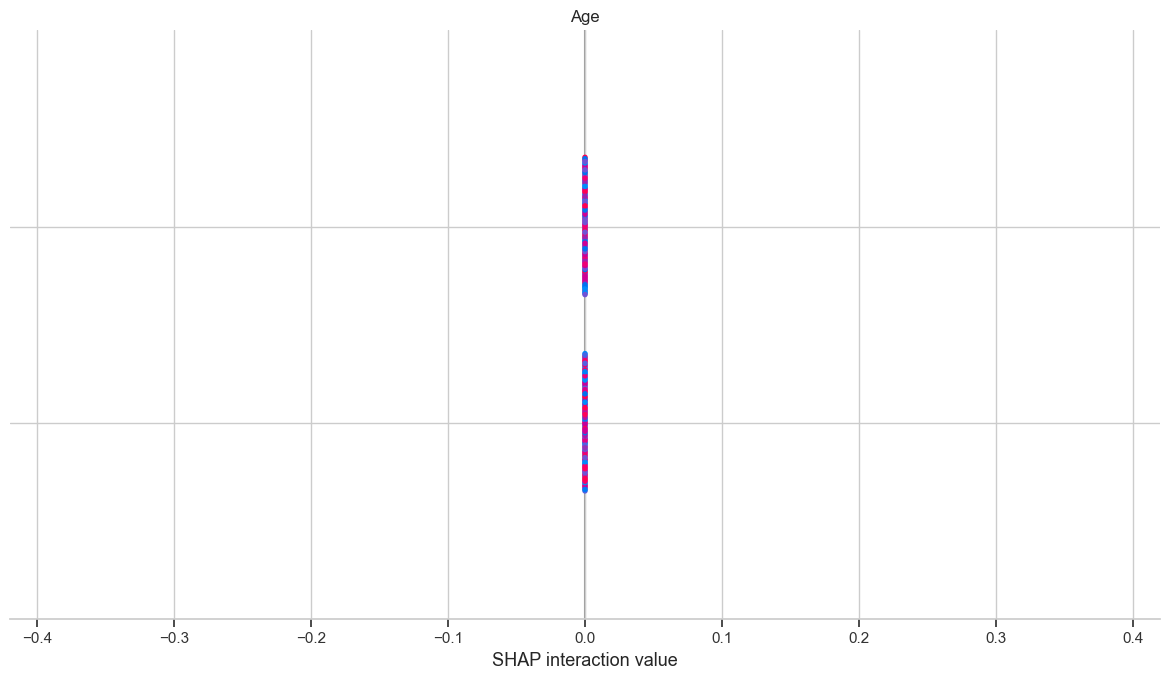

In [47]:
# Summary plot (bar)
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [48]:
df['Prediction'] = dt.predict(df.drop('Attrition', axis=1))
df['PredictionLabel'] = df['Prediction'].map({0: 'No Attrition', 1: 'Attrition'})
df['ActualLabel'] = df['Attrition'].map({0: 'No Attrition', 1: 'Attrition'})


In [49]:
# Save the original department and salary labels
original_department_list = df['Department'].unique()  # Before encoding
original_salary_list = df['Salary'].unique()  # Before encoding


In [50]:
# Apply LabelEncoder
le_dept = LabelEncoder()
df['Department'] = le_dept.fit_transform(df['Department'])

le_salary = LabelEncoder()
df['Salary'] = le_salary.fit_transform(df['Salary'])


In [51]:
# Reverse the encoding
df['Department'] = le_dept.inverse_transform(df['Department'])
df['Salary'] = le_salary.inverse_transform(df['Salary'])


original_department_list = df['Department'].unique()
original_salary_list = df['Salary'].unique()


In [52]:
from sklearn.preprocessing import LabelEncoder

le_dept = LabelEncoder()
le_dept.fit(original_department_list)  # original list from before encoding
df['Department'] = le_dept.inverse_transform(df['Department'])

le_salary = LabelEncoder()
le_salary.fit(original_salary_list)
df['Salary'] = le_salary.inverse_transform(df['Salary'])


In [53]:
df.to_csv("PowerBI_Ready_HR_Data.csv", index=False)
